## Pneumonia Detection from Chest X-rays

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = 'C:\\Users\\pradeep\\Downloads\\chest_xray\\train'
test_dir = 'C:\\Users\\pradeep\\Downloads\\chest_xray\\test'
val_dir = 'C:\\Users\\pradeep\\Downloads\\chest_xray\\val'

In [3]:
# Show List of Dir in Train Data
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [4]:
normal = os.path.join(train_dir,'Normal')
print(len(os.listdir(normal)))

1341


### EDA Performing

In [5]:
# Shape of all datasets
def count_images_in_dir(dir):
    categories = ['NORMAL', 'PNEUMONIA']
    for category in categories:
        path = os.path.join(dir, category)
        print(f"{category}: {len(os.listdir(path))} images")
        
        
print("Train Dataset :")
count_images_in_dir(train_dir)

print("\nTest Dataset : ")
count_images_in_dir(test_dir)

print("\nValid Dataset : ")
count_images_in_dir(val_dir)

Train Dataset :
NORMAL: 1341 images
PNEUMONIA: 3875 images

Test Dataset : 
NORMAL: 234 images
PNEUMONIA: 390 images

Valid Dataset : 
NORMAL: 8 images
PNEUMONIA: 8 images


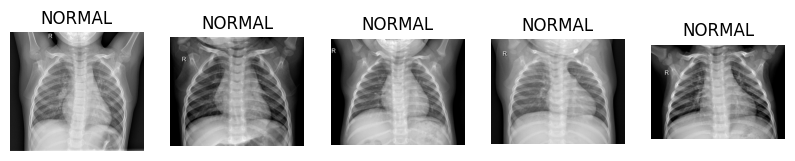

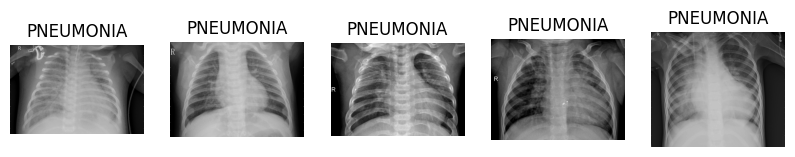

In [6]:
def display_sample_images(dir, category, num_images=5):
    path = os.path.join(dir, category)
    images = os.listdir(path)[:num_images]
    plt.figure(figsize=(10,5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')
    plt.show()
    
display_sample_images(train_dir, 'NORMAL')
display_sample_images(train_dir, 'PNEUMONIA')
        

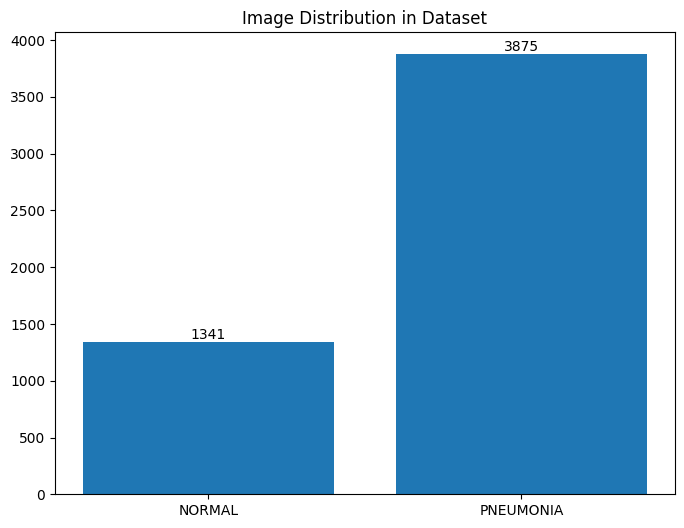

In [7]:
def plot_image_distribution(directory):
    data = []
    categories = ['NORMAL', 'PNEUMONIA']
    for category in categories:
        path = os.path.join(directory, category)
        count = len(os.listdir(path))
        data.append((category, count))
        
    df = pd.DataFrame(data, columns=['Category', 'Count'])
    plt.figure(figsize=[8,6])
    bars = plt.bar(df['Category'], df['Count'])
    plt.bar_label(bars)
    plt.title('Image Distribution in Dataset')
    plt.show()

plot_image_distribution(train_dir)

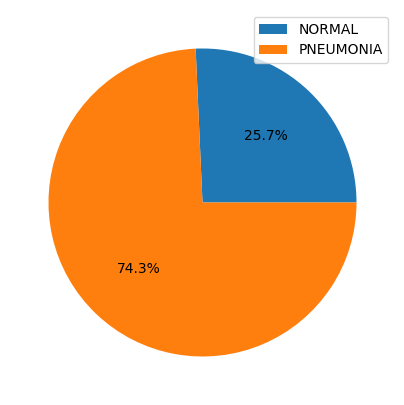

In [8]:

def pie_image_distribution(dir):
    data =[]
    categories = ['NORMAL', 'PNEUMONIA']
    for category in categories:
        path = os.path.join(dir, category)
        count = len(os.listdir(path))
        data.append((category, count))
        
    df = pd.DataFrame(data, columns=['Category', 'Count'])
    plt.figure(figsize=[5,5])
    plt.pie(df['Count'], autopct='%1.1f%%')
    plt.legend(df['Category'])
    plt.show()
pie_image_distribution(train_dir)

### Data Augmentation and Preprocessing

In [9]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True, shear_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = train_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Model Building

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [26]:
from tensorflow.keras.optimizers import Adam
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

### Early Stopping & Model Training

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.weights.h5', monitor = 'val_loss', mode = 'min', verbose = 1, save_best_only = True, save_weights_only = True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.8305 - loss: 0.7794
Epoch 1: val_loss improved from inf to 35.53415, saving model to best_model.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 615ms/step - accuracy: 0.8307 - loss: 0.7776 - val_accuracy: 0.5000 - val_loss: 35.5341
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.8818 - loss: 0.2797
Epoch 2: val_loss improved from 35.53415 to 14.46119, saving model to best_model.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 577ms/step - accuracy: 0.8818 - loss: 0.2797 - val_accuracy: 0.5000 - val_loss: 14.4612
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.8963 - loss: 0.2561
Epoch 3: val_loss did not improve from 14.46119
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 757ms/step - accuracy: 0.8964 - loss: 0.2561 - val_accuracy: 0.5000 - val_loss: 17.8706
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.9081 - loss: 0.2763
Epoch 4: val_loss improved from 14.46119 to 2.47949, sav

### Model Evaluation

In [31]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 815ms/step - accuracy: 0.8653 - loss: 0.4262
Test Accuracy: 86.86%


In [32]:
# Classification report and confusion matrix
y_pred = (model.predict(test_generator) > 0.5).astype("int32")
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 438ms/step
              precision    recall  f1-score   support

      Normal       0.81      0.85      0.83       234
   Pneumonia       0.91      0.88      0.89       390

    accuracy                           0.87       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



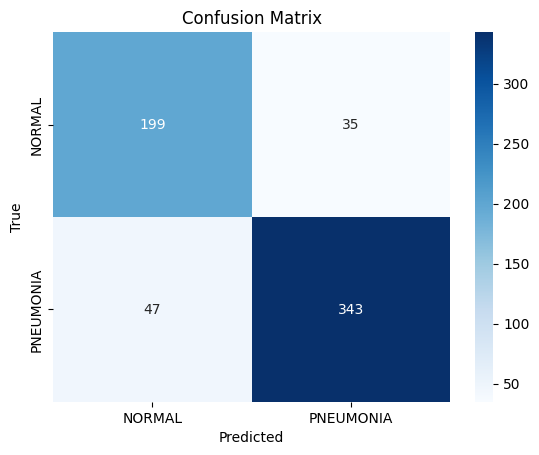

In [33]:
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


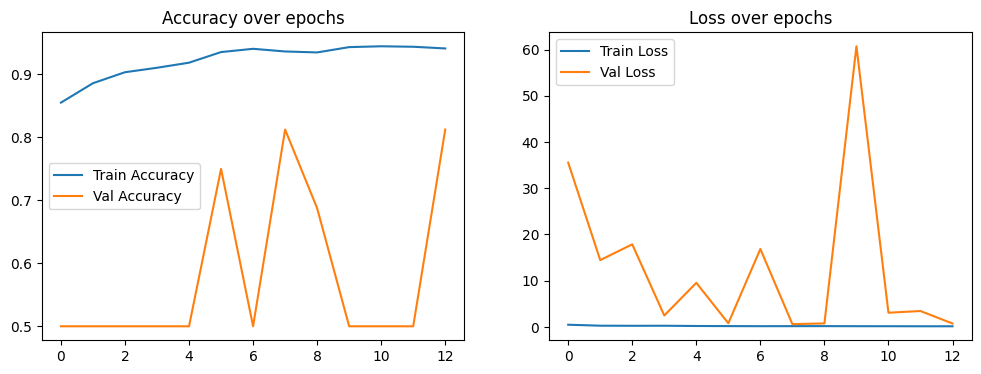

In [34]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.legend()

plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step


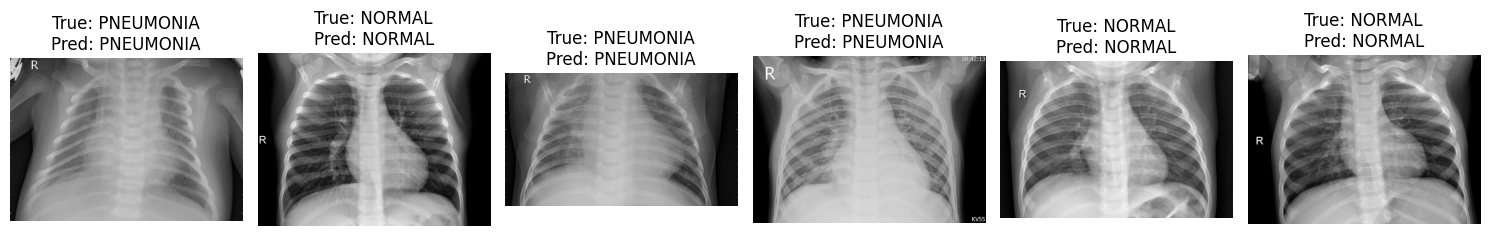

In [46]:
import numpy as np

# Get predictions and corresponding filenames
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32").flatten()
actual_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
filenames = test_generator.filenames

# Display 5 random images from test set with predictions and actual labels
plt.figure(figsize=(15, 10))

for i, idx in enumerate(np.random.choice(len(filenames), 6, replace=False)):
    img_path = os.path.join(test_dir, filenames[idx])
    img = Image.open(img_path)
    
    true_label = class_labels[actual_classes[idx]]
    pred_label = class_labels[predicted_classes[idx]]
    
    plt.subplot(1, 6, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [48]:
# Save the model
# model.save("pneumonia_detection_model.h5")
